<a href="https://colab.research.google.com/github/thayyilakul/Tensorflow-ML/blob/main/10_types_of_food_multi_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
import math
print(tf.__version__)

2.17.1


In [4]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

--2024-12-11 17:36:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  74.5MB/s    in 6.0s    

2024-12-11 17:36:44 (82.8 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [5]:
import os

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/test
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
There are 10 directories and 0 images in 10_fo

In [6]:
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [9]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(f'Image shape: {img.shape}')
  return img

Image shape: (384, 512, 3)


array([[[82, 64, 42],
        [74, 56, 34],
        [60, 40, 16],
        ...,
        [23, 14,  7],
        [20, 13,  5],
        [17, 10,  2]],

       [[75, 57, 37],
        [62, 44, 22],
        [74, 53, 32],
        ...,
        [27, 18, 11],
        [22, 15,  7],
        [18, 11,  3]],

       [[61, 44, 26],
        [57, 40, 20],
        [98, 80, 60],
        ...,
        [25, 18,  8],
        [20, 13,  3],
        [16,  9,  0]],

       ...,

       [[35, 23,  7],
        [30, 17,  0],
        [34, 19,  0],
        ...,
        [60, 37, 19],
        [55, 32, 14],
        [56, 33, 15]],

       [[46, 36, 24],
        [36, 27, 12],
        [28, 15,  0],
        ...,
        [65, 44, 27],
        [60, 37, 21],
        [52, 29, 13]],

       [[37, 29, 18],
        [50, 40, 28],
        [42, 30, 14],
        ...,
        [63, 42, 25],
        [70, 47, 33],
        [62, 39, 25]]], dtype=uint8)
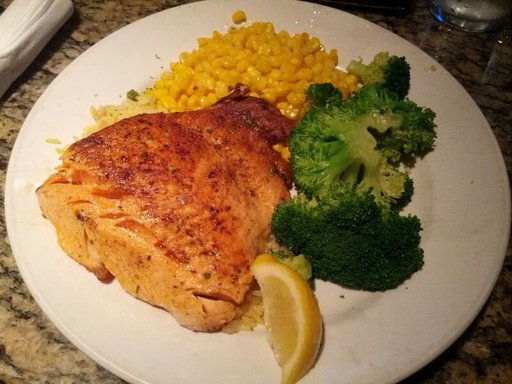

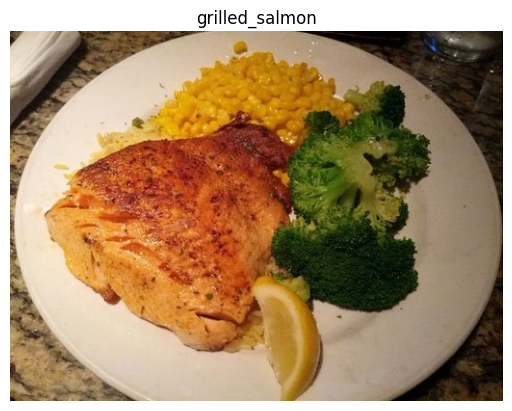

In [11]:
view_random_image(train_dir, random.choice(class_names))

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Input

model_1 = Sequential([
    Input(shape = (224, 224, 3)),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax')
])

model_1.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [21]:
history_1 = model_1.fit(train_data,
            epochs = 5,
            steps_per_epoch = math.ceil(len(train_data) / 32),
            validation_data = test_data,
            validation_steps = math.ceil(len(test_data) / 32))

Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.1201 - loss: 2.3716 - val_accuracy: 0.1354 - val_loss: 2.3083
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.1492 - loss: 2.3041 - val_accuracy: 0.1146 - val_loss: 2.3054
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.1045 - loss: 2.2934 - val_accuracy: 0.1250 - val_loss: 2.2897
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.1354 - loss: 2.2976 - val_accuracy: 0.2188 - val_loss: 2.2743
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.2008 - loss: 2.2695 - val_accuracy: 0.1250 - val_loss: 2.2605


In [19]:
model_1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 50s 632ms/step - accuracy: 0.1857 - loss: 2.1855


[2.1826071739196777, 0.18880000710487366]

In [22]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label = 'Training Loss')
  plt.plot(epochs, val_loss, label = 'Validation Loss')
  plt.title('Loss')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label = 'Training Accuracy')
  plt.plot(epochs, val_accuracy, label = 'Validation Accuracy')
  plt.title('Accuracy')
  plt.xlabel('epochs')
  plt.legend();

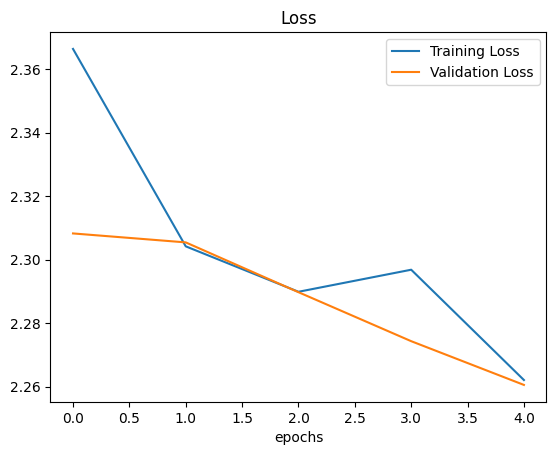

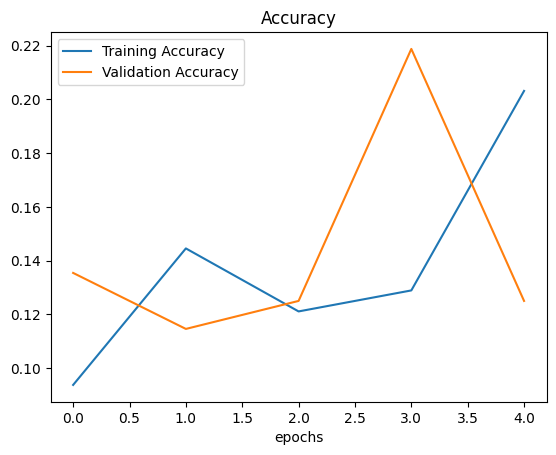

In [23]:
plot_loss_curves(history_1)

In [24]:
model_2 = Sequential([
    Input(shape = (224, 224, 3)),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax')
])

model_2.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = math.ceil(len(train_data) / 32),
                        validation_data = test_data,
                        validation_steps = math.ceil(len(test_data) / 32))

Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.0943 - loss: 3.0039 - val_accuracy: 0.1354 - val_loss: 2.3854
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.1449 - loss: 2.4144 - val_accuracy: 0.1667 - val_loss: 2.5069
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.1199 - loss: 2.3282 - val_accuracy: 0.0938 - val_loss: 2.2747
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 983ms/step - accuracy: 0.1555 - loss: 2.2419 - val_accuracy: 0.1458 - val_loss: 2.2520
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.1905 - loss: 2.2601 - val_accuracy: 0.1667 - val_loss: 2.2067


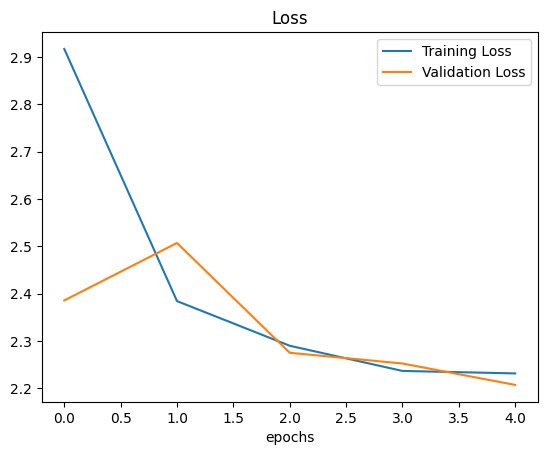

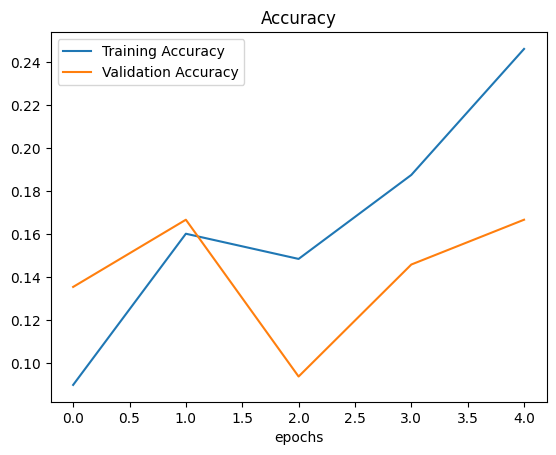

In [25]:
plot_loss_curves(history_2)

In [28]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 20,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip = True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                         target_size = (224, 224),
                                                         batch_size = 32,
                                                         class_mode = 'categorical')

Found 7500 images belonging to 10 classes.


In [30]:
model_3 = tf.keras.models.clone_model(model_2)

model_3.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

history_3 = model_3.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = math.ceil(len(train_data_augmented) / 32),
                        validation_data = test_data,
                        validation_steps = math.ceil(len(test_data) / 32))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.1025 - loss: 2.9972 - val_accuracy: 0.0938 - val_loss: 2.6299
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.1152 - loss: 2.6285 - val_accuracy: 0.0938 - val_loss: 2.4427
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.1139 - loss: 2.3756 - val_accuracy: 0.0417 - val_loss: 2.3069
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.0958 - loss: 2.2982 - val_accuracy: 0.1042 - val_loss: 2.2885
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.0917 - loss: 2.2901 - val_accuracy: 0.0938 - val_loss: 2.2973


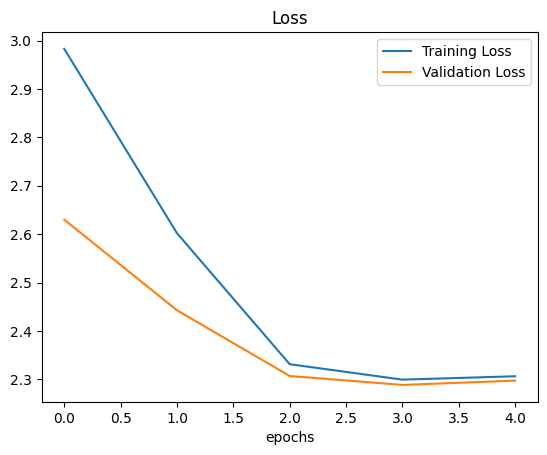

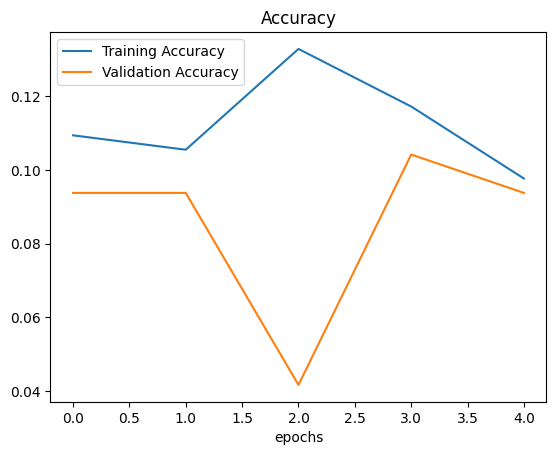

In [31]:
plot_loss_curves(history_3)

In [32]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [33]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [34]:
def load_and_prep_image(filename, img_shape = 224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels = 3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

In [40]:
def pred_and_plot(model, filename, class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis = 0))
  pred_class = class_names[pred.argmax()]
  plt.imshow(img)
  plt.title(f'Prediction : {pred_class}')
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


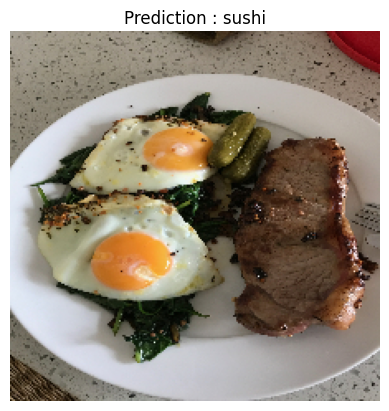

In [41]:
pred_and_plot(model_3, '03-steak.jpeg',class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


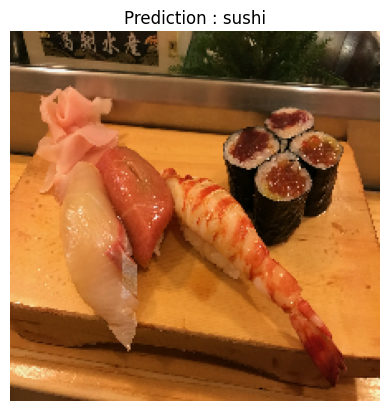

In [42]:
pred_and_plot(model_3, '03-sushi.jpeg',class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


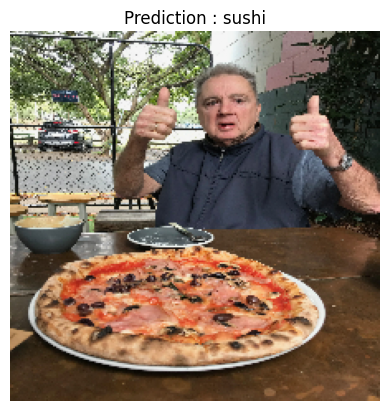

In [43]:
pred_and_plot(model_3, "03-pizza-dad.jpeg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


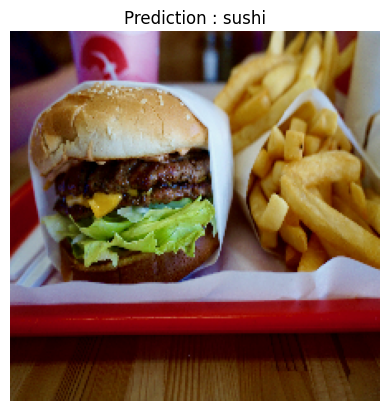

In [45]:
pred_and_plot(model_3, "03-hamburger.jpeg", class_names)